# Machine Learning

## RandomForest
For ease, the random forest classification ML will be used because of its:
- Flexibility
- Insensitive towards outliers
- Does not require feature scaling

## CatBoost
CatBoost is a variant of gradient boost algorithms. Will also be used for it's robustness but also for it's built in techniques such as:
- Built-in Method for handling categorical features
- Great results without the need for parameter tuning
- Automatic feature scaling
- Robust to overfitting
- Built in cross-validation

## 1 - Import Libraries

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML, display
from tabulate import tabulate
import math
import scipy.stats

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss, roc_auc_score, roc_curve, auc
import catboost
from catboost import CatBoostClassifier

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

## 2 - Load Data

In [78]:
# RandomForestClassifier (RFC)
train_df = pd.read_csv('prep_train_data.csv').drop('patient_id', axis = 1)
test_df = pd.read_csv('prep_test_data.csv')

train_df.head(2)

,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,DiagPeriodL90D,pollutants,age_group,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163
0,924,84,27.526253,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.10000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,24563.57143,44.585714,8674.50000,264634.2857,1165.000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.50000,1,8407.933786,90,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,928,62,28.490000,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.50303,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,41287.27273,61.463636,11725.66667,677688.5152,2003.125,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.10303,1,7220.973636,70,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [79]:
# Catboost (CB)
train_cat_df = pd.read_csv('cleaned_train_df.csv').drop('patient_id', axis = 1)
test_cat_df = pd.read_csv('cleaned_test_df.csv')

train_cat_df.head(2)

,patient_race,payer_type,patient_zip3,patient_age,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,DiagPeriodL90D,pollutants,age_group
0,White,MEDICAID,924,84,27.526253,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.10000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,24563.57143,44.585714,8674.50000,264634.2857,1165.000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.50000,1,8407.933786,90
1,White,COMMERCIAL,928,62,28.490000,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.50303,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,41287.27273,61.463636,11725.66667,677688.5152,2003.125,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.10303,1,7220.973636,70


### Note:
The difference in datasets used between RandomForest and CatBoost. CatBoost uses the cleaned dataset that includes the imputations of the missing data, and the dropped columns that were deemed redundant or useless as it didn't provide variability or predictive power. RandomForest inherits that same cleaned dataset but includes one-hot encoded columns.

## 3 - Problem Formulation

### 3.1 RFC

In [82]:
# split df into features vs. target variable

X_train = train_df.drop('DiagPeriodL90D', axis = 1)
Y_train = train_df['DiagPeriodL90D']

In [83]:
# split df into train and validation sets

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

### 3.2 CB

In [84]:
# split df into features vs. target variable

X_train_cat = train_cat_df.drop('DiagPeriodL90D', axis = 1)
Y_train_cat = train_cat_df['DiagPeriodL90D']

In [85]:
# split df into train and validation sets

X_train_cat, X_val_cat, Y_train_cat, Y_val_cat = train_test_split(X_train_cat, Y_train_cat, test_size=0.2, random_state=42)

## 4 - Train ML Algorithm

### 4.1 RFC

In [86]:
# train using RFC
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, Y_train)

# predict RFC validation set

# class predictions
Y_pred = rf.predict(X_val)
# probability predictions
Y_prob = rf.predict_proba(X_val)

### 4.2 CB

In [142]:
# train using CB
one_hot_max_size = 40
cat_features = X_train_cat.select_dtypes(include=['object']).columns.tolist()
cb = CatBoostClassifier(cat_features=cat_features, n_estimators=1000, one_hot_max_size=one_hot_max_size)
cb.fit(X_train_cat, Y_train_cat)

# predict CB validation set

# class predictions
class_predictions = cb.predict(X_val_cat)
# probability predictions
prob_predictions = cb.predict_proba(X_val_cat)

Learning rate set to 0.006381
0:	learn: 0.6900361	total: 34.8ms	remaining: 2m 53s
1:	learn: 0.6869460	total: 49.9ms	remaining: 2m 4s
2:	learn: 0.6839014	total: 68.1ms	remaining: 1m 53s
3:	learn: 0.6809722	total: 80.8ms	remaining: 1m 40s
4:	learn: 0.6780425	total: 93.1ms	remaining: 1m 33s
5:	learn: 0.6751584	total: 105ms	remaining: 1m 26s
6:	learn: 0.6723419	total: 116ms	remaining: 1m 23s
7:	learn: 0.6696163	total: 128ms	remaining: 1m 20s
8:	learn: 0.6668635	total: 143ms	remaining: 1m 19s
9:	learn: 0.6641050	total: 156ms	remaining: 1m 17s
10:	learn: 0.6614440	total: 168ms	remaining: 1m 16s
11:	learn: 0.6587634	total: 180ms	remaining: 1m 14s
12:	learn: 0.6561688	total: 195ms	remaining: 1m 14s
13:	learn: 0.6535991	total: 214ms	remaining: 1m 16s
14:	learn: 0.6510482	total: 229ms	remaining: 1m 16s
15:	learn: 0.6486258	total: 242ms	remaining: 1m 15s
16:	learn: 0.6460782	total: 253ms	remaining: 1m 14s
17:	learn: 0.6436235	total: 266ms	remaining: 1m 13s
18:	learn: 0.6413241	total: 277ms	remain

163:	learn: 0.4935773	total: 2.04s	remaining: 1m
164:	learn: 0.4932289	total: 2.06s	remaining: 1m
165:	learn: 0.4929050	total: 2.07s	remaining: 1m
166:	learn: 0.4925639	total: 2.08s	remaining: 1m
167:	learn: 0.4922449	total: 2.09s	remaining: 1m
168:	learn: 0.4919442	total: 2.1s	remaining: 1m
169:	learn: 0.4916076	total: 2.11s	remaining: 1m
170:	learn: 0.4913085	total: 2.12s	remaining: 59.9s
171:	learn: 0.4909967	total: 2.13s	remaining: 59.9s
172:	learn: 0.4907108	total: 2.15s	remaining: 59.9s
173:	learn: 0.4904322	total: 2.16s	remaining: 59.8s
174:	learn: 0.4901288	total: 2.17s	remaining: 59.8s
175:	learn: 0.4898441	total: 2.18s	remaining: 59.7s
176:	learn: 0.4895118	total: 2.19s	remaining: 59.7s
177:	learn: 0.4892418	total: 2.2s	remaining: 59.6s
178:	learn: 0.4889614	total: 2.21s	remaining: 59.5s
179:	learn: 0.4886851	total: 2.22s	remaining: 59.4s
180:	learn: 0.4884391	total: 2.23s	remaining: 59.4s
181:	learn: 0.4881570	total: 2.24s	remaining: 59.3s
182:	learn: 0.4878698	total: 2.25s	

335:	learn: 0.4659513	total: 4.07s	remaining: 56.6s
336:	learn: 0.4658672	total: 4.09s	remaining: 56.6s
337:	learn: 0.4657775	total: 4.1s	remaining: 56.6s
338:	learn: 0.4657482	total: 4.11s	remaining: 56.5s
339:	learn: 0.4656921	total: 4.12s	remaining: 56.5s
340:	learn: 0.4656336	total: 4.13s	remaining: 56.4s
341:	learn: 0.4655509	total: 4.14s	remaining: 56.4s
342:	learn: 0.4654752	total: 4.15s	remaining: 56.4s
343:	learn: 0.4653873	total: 4.16s	remaining: 56.3s
344:	learn: 0.4653231	total: 4.17s	remaining: 56.3s
345:	learn: 0.4652526	total: 4.18s	remaining: 56.3s
346:	learn: 0.4651928	total: 4.2s	remaining: 56.3s
347:	learn: 0.4651189	total: 4.21s	remaining: 56.2s
348:	learn: 0.4650524	total: 4.22s	remaining: 56.2s
349:	learn: 0.4649919	total: 4.23s	remaining: 56.2s
350:	learn: 0.4649305	total: 4.24s	remaining: 56.1s
351:	learn: 0.4648846	total: 4.25s	remaining: 56.1s
352:	learn: 0.4648217	total: 4.26s	remaining: 56.1s
353:	learn: 0.4647474	total: 4.27s	remaining: 56.1s
354:	learn: 0.

500:	learn: 0.4572549	total: 6.76s	remaining: 1m
501:	learn: 0.4572148	total: 6.79s	remaining: 1m
502:	learn: 0.4571634	total: 6.82s	remaining: 1m
503:	learn: 0.4571094	total: 6.83s	remaining: 1m
504:	learn: 0.4570753	total: 6.85s	remaining: 1m
505:	learn: 0.4570432	total: 6.86s	remaining: 1m
506:	learn: 0.4570031	total: 6.87s	remaining: 1m
507:	learn: 0.4569577	total: 6.89s	remaining: 1m
508:	learn: 0.4569076	total: 6.9s	remaining: 1m
509:	learn: 0.4568591	total: 6.91s	remaining: 1m
510:	learn: 0.4568311	total: 6.93s	remaining: 1m
511:	learn: 0.4568126	total: 6.94s	remaining: 1m
512:	learn: 0.4567567	total: 6.96s	remaining: 1m
513:	learn: 0.4567231	total: 7.01s	remaining: 1m 1s
514:	learn: 0.4566811	total: 7.04s	remaining: 1m 1s
515:	learn: 0.4566330	total: 7.06s	remaining: 1m 1s
516:	learn: 0.4565884	total: 7.08s	remaining: 1m 1s
517:	learn: 0.4565661	total: 7.09s	remaining: 1m 1s
518:	learn: 0.4564855	total: 7.1s	remaining: 1m 1s
519:	learn: 0.4564376	total: 7.11s	remaining: 1m 1s
5

672:	learn: 0.4508436	total: 9.28s	remaining: 59.7s
673:	learn: 0.4508022	total: 9.29s	remaining: 59.6s
674:	learn: 0.4507735	total: 9.3s	remaining: 59.6s
675:	learn: 0.4507400	total: 9.31s	remaining: 59.6s
676:	learn: 0.4506889	total: 9.32s	remaining: 59.5s
677:	learn: 0.4506548	total: 9.34s	remaining: 59.5s
678:	learn: 0.4506382	total: 9.35s	remaining: 59.5s
679:	learn: 0.4506042	total: 9.36s	remaining: 59.5s
680:	learn: 0.4505645	total: 9.37s	remaining: 59.4s
681:	learn: 0.4505352	total: 9.38s	remaining: 59.4s
682:	learn: 0.4505002	total: 9.39s	remaining: 59.4s
683:	learn: 0.4504755	total: 9.4s	remaining: 59.3s
684:	learn: 0.4504393	total: 9.41s	remaining: 59.3s
685:	learn: 0.4504288	total: 9.42s	remaining: 59.2s
686:	learn: 0.4503843	total: 9.43s	remaining: 59.2s
687:	learn: 0.4503613	total: 9.44s	remaining: 59.2s
688:	learn: 0.4503347	total: 9.46s	remaining: 59.2s
689:	learn: 0.4502986	total: 9.47s	remaining: 59.1s
690:	learn: 0.4502730	total: 9.48s	remaining: 59.1s
691:	learn: 0.

843:	learn: 0.4450885	total: 11.4s	remaining: 55.9s
844:	learn: 0.4450630	total: 11.4s	remaining: 55.9s
845:	learn: 0.4450259	total: 11.4s	remaining: 55.9s
846:	learn: 0.4450093	total: 11.4s	remaining: 55.9s
847:	learn: 0.4449742	total: 11.4s	remaining: 55.9s
848:	learn: 0.4449726	total: 11.4s	remaining: 55.8s
849:	learn: 0.4449538	total: 11.4s	remaining: 55.8s
850:	learn: 0.4449406	total: 11.4s	remaining: 55.8s
851:	learn: 0.4449172	total: 11.4s	remaining: 55.7s
852:	learn: 0.4448776	total: 11.5s	remaining: 55.7s
853:	learn: 0.4448458	total: 11.5s	remaining: 55.7s
854:	learn: 0.4448191	total: 11.5s	remaining: 55.7s
855:	learn: 0.4447748	total: 11.5s	remaining: 55.6s
856:	learn: 0.4447488	total: 11.5s	remaining: 55.6s
857:	learn: 0.4447211	total: 11.5s	remaining: 55.6s
858:	learn: 0.4446971	total: 11.5s	remaining: 55.6s
859:	learn: 0.4446760	total: 11.5s	remaining: 55.5s
860:	learn: 0.4446391	total: 11.6s	remaining: 55.5s
861:	learn: 0.4446201	total: 11.6s	remaining: 55.5s
862:	learn: 

1013:	learn: 0.4400207	total: 13.4s	remaining: 52.7s
1014:	learn: 0.4399804	total: 13.4s	remaining: 52.7s
1015:	learn: 0.4399649	total: 13.4s	remaining: 52.7s
1016:	learn: 0.4399341	total: 13.4s	remaining: 52.7s
1017:	learn: 0.4399036	total: 13.5s	remaining: 52.6s
1018:	learn: 0.4398568	total: 13.5s	remaining: 52.6s
1019:	learn: 0.4398181	total: 13.5s	remaining: 52.6s
1020:	learn: 0.4397972	total: 13.5s	remaining: 52.6s
1021:	learn: 0.4397697	total: 13.5s	remaining: 52.6s
1022:	learn: 0.4397270	total: 13.5s	remaining: 52.6s
1023:	learn: 0.4396664	total: 13.5s	remaining: 52.6s
1024:	learn: 0.4396487	total: 13.6s	remaining: 52.6s
1025:	learn: 0.4396293	total: 13.6s	remaining: 52.6s
1026:	learn: 0.4396121	total: 13.6s	remaining: 52.6s
1027:	learn: 0.4395979	total: 13.6s	remaining: 52.5s
1028:	learn: 0.4395642	total: 13.6s	remaining: 52.5s
1029:	learn: 0.4395424	total: 13.6s	remaining: 52.5s
1030:	learn: 0.4394922	total: 13.6s	remaining: 52.5s
1031:	learn: 0.4394594	total: 13.7s	remaining:

1177:	learn: 0.4353702	total: 15.5s	remaining: 50.1s
1178:	learn: 0.4353552	total: 15.5s	remaining: 50.1s
1179:	learn: 0.4353017	total: 15.5s	remaining: 50.1s
1180:	learn: 0.4352587	total: 15.5s	remaining: 50.1s
1181:	learn: 0.4352283	total: 15.5s	remaining: 50.1s
1182:	learn: 0.4352026	total: 15.5s	remaining: 50.1s
1183:	learn: 0.4351807	total: 15.5s	remaining: 50s
1184:	learn: 0.4351679	total: 15.5s	remaining: 50s
1185:	learn: 0.4351475	total: 15.5s	remaining: 50s
1186:	learn: 0.4351263	total: 15.6s	remaining: 50s
1187:	learn: 0.4351067	total: 15.6s	remaining: 50s
1188:	learn: 0.4350800	total: 15.6s	remaining: 50s
1189:	learn: 0.4350437	total: 15.6s	remaining: 49.9s
1190:	learn: 0.4350224	total: 15.6s	remaining: 49.9s
1191:	learn: 0.4349900	total: 15.6s	remaining: 49.9s
1192:	learn: 0.4349504	total: 15.6s	remaining: 49.9s
1193:	learn: 0.4349305	total: 15.6s	remaining: 49.9s
1194:	learn: 0.4349021	total: 15.7s	remaining: 49.9s
1195:	learn: 0.4348685	total: 15.7s	remaining: 49.8s
1196:

1345:	learn: 0.4305690	total: 17.5s	remaining: 47.6s
1346:	learn: 0.4305442	total: 17.5s	remaining: 47.6s
1347:	learn: 0.4305287	total: 17.6s	remaining: 47.6s
1348:	learn: 0.4304947	total: 17.6s	remaining: 47.5s
1349:	learn: 0.4304641	total: 17.6s	remaining: 47.5s
1350:	learn: 0.4304562	total: 17.6s	remaining: 47.5s
1351:	learn: 0.4304427	total: 17.6s	remaining: 47.5s
1352:	learn: 0.4304253	total: 17.6s	remaining: 47.5s
1353:	learn: 0.4304031	total: 17.6s	remaining: 47.5s
1354:	learn: 0.4303748	total: 17.6s	remaining: 47.5s
1355:	learn: 0.4303344	total: 17.7s	remaining: 47.5s
1356:	learn: 0.4302818	total: 17.7s	remaining: 47.4s
1357:	learn: 0.4302354	total: 17.7s	remaining: 47.4s
1358:	learn: 0.4302073	total: 17.7s	remaining: 47.4s
1359:	learn: 0.4301875	total: 17.7s	remaining: 47.4s
1360:	learn: 0.4301586	total: 17.7s	remaining: 47.4s
1361:	learn: 0.4301304	total: 17.7s	remaining: 47.3s
1362:	learn: 0.4300972	total: 17.7s	remaining: 47.3s
1363:	learn: 0.4300605	total: 17.8s	remaining:

1505:	learn: 0.4261296	total: 19.4s	remaining: 44.9s
1506:	learn: 0.4261003	total: 19.4s	remaining: 44.9s
1507:	learn: 0.4260750	total: 19.4s	remaining: 44.9s
1508:	learn: 0.4260633	total: 19.4s	remaining: 44.9s
1509:	learn: 0.4260432	total: 19.4s	remaining: 44.9s
1510:	learn: 0.4260166	total: 19.4s	remaining: 44.9s
1511:	learn: 0.4259947	total: 19.4s	remaining: 44.8s
1512:	learn: 0.4259681	total: 19.5s	remaining: 44.8s
1513:	learn: 0.4259295	total: 19.5s	remaining: 44.8s
1514:	learn: 0.4258891	total: 19.5s	remaining: 44.8s
1515:	learn: 0.4258527	total: 19.5s	remaining: 44.8s
1516:	learn: 0.4258371	total: 19.5s	remaining: 44.8s
1517:	learn: 0.4258093	total: 19.5s	remaining: 44.7s
1518:	learn: 0.4257763	total: 19.5s	remaining: 44.7s
1519:	learn: 0.4257564	total: 19.5s	remaining: 44.7s
1520:	learn: 0.4257382	total: 19.5s	remaining: 44.7s
1521:	learn: 0.4256897	total: 19.6s	remaining: 44.7s
1522:	learn: 0.4256691	total: 19.6s	remaining: 44.7s
1523:	learn: 0.4256541	total: 19.6s	remaining:

1661:	learn: 0.4220626	total: 21.2s	remaining: 42.6s
1662:	learn: 0.4220475	total: 21.2s	remaining: 42.6s
1663:	learn: 0.4220071	total: 21.2s	remaining: 42.6s
1664:	learn: 0.4219682	total: 21.2s	remaining: 42.5s
1665:	learn: 0.4219491	total: 21.3s	remaining: 42.5s
1666:	learn: 0.4219315	total: 21.3s	remaining: 42.5s
1667:	learn: 0.4219005	total: 21.3s	remaining: 42.5s
1668:	learn: 0.4218788	total: 21.3s	remaining: 42.5s
1669:	learn: 0.4218533	total: 21.3s	remaining: 42.5s
1670:	learn: 0.4218225	total: 21.3s	remaining: 42.5s
1671:	learn: 0.4217994	total: 21.3s	remaining: 42.4s
1672:	learn: 0.4217521	total: 21.3s	remaining: 42.4s
1673:	learn: 0.4217269	total: 21.3s	remaining: 42.4s
1674:	learn: 0.4216991	total: 21.4s	remaining: 42.4s
1675:	learn: 0.4216710	total: 21.4s	remaining: 42.4s
1676:	learn: 0.4216356	total: 21.4s	remaining: 42.4s
1677:	learn: 0.4216045	total: 21.4s	remaining: 42.3s
1678:	learn: 0.4215794	total: 21.4s	remaining: 42.3s
1679:	learn: 0.4215647	total: 21.4s	remaining:

1820:	learn: 0.4174169	total: 23s	remaining: 40.2s
1821:	learn: 0.4173824	total: 23.1s	remaining: 40.2s
1822:	learn: 0.4173606	total: 23.1s	remaining: 40.2s
1823:	learn: 0.4173250	total: 23.1s	remaining: 40.2s
1824:	learn: 0.4173083	total: 23.1s	remaining: 40.2s
1825:	learn: 0.4172905	total: 23.1s	remaining: 40.2s
1826:	learn: 0.4172558	total: 23.1s	remaining: 40.1s
1827:	learn: 0.4172254	total: 23.1s	remaining: 40.1s
1828:	learn: 0.4171956	total: 23.1s	remaining: 40.1s
1829:	learn: 0.4171774	total: 23.1s	remaining: 40.1s
1830:	learn: 0.4171642	total: 23.2s	remaining: 40.1s
1831:	learn: 0.4171304	total: 23.2s	remaining: 40.1s
1832:	learn: 0.4170737	total: 23.2s	remaining: 40s
1833:	learn: 0.4170438	total: 23.2s	remaining: 40s
1834:	learn: 0.4170295	total: 23.2s	remaining: 40s
1835:	learn: 0.4170170	total: 23.2s	remaining: 40s
1836:	learn: 0.4169932	total: 23.2s	remaining: 40s
1837:	learn: 0.4169633	total: 23.2s	remaining: 40s
1838:	learn: 0.4169428	total: 23.3s	remaining: 40s
1839:	lea

1977:	learn: 0.4127527	total: 24.9s	remaining: 38s
1978:	learn: 0.4127188	total: 24.9s	remaining: 38s
1979:	learn: 0.4126969	total: 24.9s	remaining: 38s
1980:	learn: 0.4126564	total: 24.9s	remaining: 38s
1981:	learn: 0.4126177	total: 24.9s	remaining: 38s
1982:	learn: 0.4125918	total: 24.9s	remaining: 38s
1983:	learn: 0.4125479	total: 25s	remaining: 37.9s
1984:	learn: 0.4125038	total: 25s	remaining: 37.9s
1985:	learn: 0.4124859	total: 25s	remaining: 37.9s
1986:	learn: 0.4124467	total: 25s	remaining: 37.9s
1987:	learn: 0.4124282	total: 25s	remaining: 37.9s
1988:	learn: 0.4124154	total: 25s	remaining: 37.9s
1989:	learn: 0.4124126	total: 25s	remaining: 37.8s
1990:	learn: 0.4123973	total: 25s	remaining: 37.8s
1991:	learn: 0.4123524	total: 25s	remaining: 37.8s
1992:	learn: 0.4123359	total: 25.1s	remaining: 37.8s
1993:	learn: 0.4123142	total: 25.1s	remaining: 37.8s
1994:	learn: 0.4122716	total: 25.1s	remaining: 37.8s
1995:	learn: 0.4122544	total: 25.1s	remaining: 37.8s
1996:	learn: 0.4122339	

2148:	learn: 0.4079071	total: 26.9s	remaining: 35.7s
2149:	learn: 0.4078650	total: 27s	remaining: 35.7s
2150:	learn: 0.4078505	total: 27s	remaining: 35.7s
2151:	learn: 0.4078103	total: 27s	remaining: 35.7s
2152:	learn: 0.4077874	total: 27s	remaining: 35.7s
2153:	learn: 0.4077679	total: 27s	remaining: 35.7s
2154:	learn: 0.4077369	total: 27s	remaining: 35.7s
2155:	learn: 0.4077079	total: 27s	remaining: 35.6s
2156:	learn: 0.4076825	total: 27s	remaining: 35.6s
2157:	learn: 0.4076472	total: 27s	remaining: 35.6s
2158:	learn: 0.4076243	total: 27.1s	remaining: 35.6s
2159:	learn: 0.4075981	total: 27.1s	remaining: 35.6s
2160:	learn: 0.4075696	total: 27.1s	remaining: 35.6s
2161:	learn: 0.4075382	total: 27.1s	remaining: 35.6s
2162:	learn: 0.4075040	total: 27.1s	remaining: 35.5s
2163:	learn: 0.4074840	total: 27.1s	remaining: 35.5s
2164:	learn: 0.4074503	total: 27.1s	remaining: 35.5s
2165:	learn: 0.4074287	total: 27.1s	remaining: 35.5s
2166:	learn: 0.4073886	total: 27.2s	remaining: 35.5s
2167:	learn

2310:	learn: 0.4033873	total: 29.2s	remaining: 34s
2311:	learn: 0.4033583	total: 29.2s	remaining: 34s
2312:	learn: 0.4033292	total: 29.2s	remaining: 34s
2313:	learn: 0.4033129	total: 29.2s	remaining: 33.9s
2314:	learn: 0.4032783	total: 29.3s	remaining: 33.9s
2315:	learn: 0.4032539	total: 29.3s	remaining: 33.9s
2316:	learn: 0.4032347	total: 29.3s	remaining: 33.9s
2317:	learn: 0.4032115	total: 29.3s	remaining: 33.9s
2318:	learn: 0.4031886	total: 29.3s	remaining: 33.9s
2319:	learn: 0.4031651	total: 29.3s	remaining: 33.9s
2320:	learn: 0.4031449	total: 29.3s	remaining: 33.8s
2321:	learn: 0.4031321	total: 29.3s	remaining: 33.8s
2322:	learn: 0.4031071	total: 29.3s	remaining: 33.8s
2323:	learn: 0.4030876	total: 29.4s	remaining: 33.8s
2324:	learn: 0.4030502	total: 29.4s	remaining: 33.8s
2325:	learn: 0.4030288	total: 29.4s	remaining: 33.8s
2326:	learn: 0.4030025	total: 29.4s	remaining: 33.8s
2327:	learn: 0.4029857	total: 29.4s	remaining: 33.8s
2328:	learn: 0.4029689	total: 29.4s	remaining: 33.7s

2473:	learn: 0.3988373	total: 31.5s	remaining: 32.2s
2474:	learn: 0.3988087	total: 31.5s	remaining: 32.1s
2475:	learn: 0.3987826	total: 31.5s	remaining: 32.1s
2476:	learn: 0.3987455	total: 31.5s	remaining: 32.1s
2477:	learn: 0.3987169	total: 31.5s	remaining: 32.1s
2478:	learn: 0.3986837	total: 31.5s	remaining: 32.1s
2479:	learn: 0.3986688	total: 31.6s	remaining: 32.1s
2480:	learn: 0.3986437	total: 31.6s	remaining: 32.1s
2481:	learn: 0.3986137	total: 31.6s	remaining: 32s
2482:	learn: 0.3985818	total: 31.6s	remaining: 32s
2483:	learn: 0.3985456	total: 31.6s	remaining: 32s
2484:	learn: 0.3985187	total: 31.6s	remaining: 32s
2485:	learn: 0.3984769	total: 31.6s	remaining: 32s
2486:	learn: 0.3984504	total: 31.6s	remaining: 32s
2487:	learn: 0.3984268	total: 31.7s	remaining: 32s
2488:	learn: 0.3984053	total: 31.7s	remaining: 31.9s
2489:	learn: 0.3983630	total: 31.7s	remaining: 31.9s
2490:	learn: 0.3983449	total: 31.7s	remaining: 31.9s
2491:	learn: 0.3983305	total: 31.7s	remaining: 31.9s
2492:	l

2643:	learn: 0.3943867	total: 33.8s	remaining: 30.1s
2644:	learn: 0.3943483	total: 33.8s	remaining: 30.1s
2645:	learn: 0.3943203	total: 33.8s	remaining: 30.1s
2646:	learn: 0.3942989	total: 33.8s	remaining: 30.1s
2647:	learn: 0.3942690	total: 33.8s	remaining: 30.1s
2648:	learn: 0.3942497	total: 33.9s	remaining: 30s
2649:	learn: 0.3942341	total: 33.9s	remaining: 30s
2650:	learn: 0.3942102	total: 33.9s	remaining: 30s
2651:	learn: 0.3941880	total: 33.9s	remaining: 30s
2652:	learn: 0.3941654	total: 33.9s	remaining: 30s
2653:	learn: 0.3941497	total: 33.9s	remaining: 30s
2654:	learn: 0.3941329	total: 33.9s	remaining: 30s
2655:	learn: 0.3941069	total: 33.9s	remaining: 29.9s
2656:	learn: 0.3940975	total: 33.9s	remaining: 29.9s
2657:	learn: 0.3940797	total: 34s	remaining: 29.9s
2658:	learn: 0.3940395	total: 34s	remaining: 29.9s
2659:	learn: 0.3940308	total: 34s	remaining: 29.9s
2660:	learn: 0.3940030	total: 34s	remaining: 29.9s
2661:	learn: 0.3939660	total: 34s	remaining: 29.9s
2662:	learn: 0.39

2805:	learn: 0.3901428	total: 36.1s	remaining: 28.2s
2806:	learn: 0.3901339	total: 36.1s	remaining: 28.2s
2807:	learn: 0.3900940	total: 36.1s	remaining: 28.2s
2808:	learn: 0.3900731	total: 36.1s	remaining: 28.2s
2809:	learn: 0.3900436	total: 36.1s	remaining: 28.2s
2810:	learn: 0.3900007	total: 36.1s	remaining: 28.1s
2811:	learn: 0.3899891	total: 36.2s	remaining: 28.1s
2812:	learn: 0.3899758	total: 36.2s	remaining: 28.1s
2813:	learn: 0.3899598	total: 36.2s	remaining: 28.1s
2814:	learn: 0.3899172	total: 36.2s	remaining: 28.1s
2815:	learn: 0.3899071	total: 36.2s	remaining: 28.1s
2816:	learn: 0.3898639	total: 36.2s	remaining: 28.1s
2817:	learn: 0.3898287	total: 36.2s	remaining: 28.1s
2818:	learn: 0.3898092	total: 36.3s	remaining: 28s
2819:	learn: 0.3897763	total: 36.3s	remaining: 28s
2820:	learn: 0.3897602	total: 36.3s	remaining: 28s
2821:	learn: 0.3897317	total: 36.3s	remaining: 28s
2822:	learn: 0.3897073	total: 36.3s	remaining: 28s
2823:	learn: 0.3897022	total: 36.3s	remaining: 28s
2824:

2962:	learn: 0.3863653	total: 38.1s	remaining: 26.2s
2963:	learn: 0.3863331	total: 38.1s	remaining: 26.2s
2964:	learn: 0.3863087	total: 38.1s	remaining: 26.2s
2965:	learn: 0.3862958	total: 38.2s	remaining: 26.2s
2966:	learn: 0.3862672	total: 38.2s	remaining: 26.2s
2967:	learn: 0.3862510	total: 38.2s	remaining: 26.1s
2968:	learn: 0.3862203	total: 38.2s	remaining: 26.1s
2969:	learn: 0.3862093	total: 38.2s	remaining: 26.1s
2970:	learn: 0.3861851	total: 38.2s	remaining: 26.1s
2971:	learn: 0.3861644	total: 38.3s	remaining: 26.1s
2972:	learn: 0.3861318	total: 38.3s	remaining: 26.1s
2973:	learn: 0.3861149	total: 38.3s	remaining: 26.1s
2974:	learn: 0.3860816	total: 38.3s	remaining: 26.1s
2975:	learn: 0.3860379	total: 38.3s	remaining: 26.1s
2976:	learn: 0.3860266	total: 38.3s	remaining: 26.1s
2977:	learn: 0.3859956	total: 38.4s	remaining: 26.1s
2978:	learn: 0.3859711	total: 38.4s	remaining: 26s
2979:	learn: 0.3859417	total: 38.4s	remaining: 26s
2980:	learn: 0.3859155	total: 38.4s	remaining: 26s

3118:	learn: 0.3827603	total: 40.2s	remaining: 24.2s
3119:	learn: 0.3827323	total: 40.2s	remaining: 24.2s
3120:	learn: 0.3827099	total: 40.2s	remaining: 24.2s
3121:	learn: 0.3826900	total: 40.2s	remaining: 24.2s
3122:	learn: 0.3826780	total: 40.2s	remaining: 24.2s
3123:	learn: 0.3826504	total: 40.2s	remaining: 24.2s
3124:	learn: 0.3826436	total: 40.3s	remaining: 24.2s
3125:	learn: 0.3826080	total: 40.3s	remaining: 24.1s
3126:	learn: 0.3825728	total: 40.3s	remaining: 24.1s
3127:	learn: 0.3825510	total: 40.3s	remaining: 24.1s
3128:	learn: 0.3825360	total: 40.3s	remaining: 24.1s
3129:	learn: 0.3825132	total: 40.3s	remaining: 24.1s
3130:	learn: 0.3824990	total: 40.3s	remaining: 24.1s
3131:	learn: 0.3824652	total: 40.3s	remaining: 24.1s
3132:	learn: 0.3824322	total: 40.3s	remaining: 24s
3133:	learn: 0.3824222	total: 40.4s	remaining: 24s
3134:	learn: 0.3824107	total: 40.4s	remaining: 24s
3135:	learn: 0.3824033	total: 40.4s	remaining: 24s
3136:	learn: 0.3823994	total: 40.4s	remaining: 24s
313

3284:	learn: 0.3786884	total: 42.3s	remaining: 22.1s
3285:	learn: 0.3786626	total: 42.3s	remaining: 22.1s
3286:	learn: 0.3786435	total: 42.3s	remaining: 22s
3287:	learn: 0.3786346	total: 42.3s	remaining: 22s
3288:	learn: 0.3786025	total: 42.3s	remaining: 22s
3289:	learn: 0.3785913	total: 42.3s	remaining: 22s
3290:	learn: 0.3785776	total: 42.3s	remaining: 22s
3291:	learn: 0.3785653	total: 42.4s	remaining: 22s
3292:	learn: 0.3785361	total: 42.4s	remaining: 22s
3293:	learn: 0.3785156	total: 42.4s	remaining: 21.9s
3294:	learn: 0.3785024	total: 42.4s	remaining: 21.9s
3295:	learn: 0.3784840	total: 42.4s	remaining: 21.9s
3296:	learn: 0.3784634	total: 42.4s	remaining: 21.9s
3297:	learn: 0.3784512	total: 42.4s	remaining: 21.9s
3298:	learn: 0.3784155	total: 42.4s	remaining: 21.9s
3299:	learn: 0.3784017	total: 42.4s	remaining: 21.9s
3300:	learn: 0.3783728	total: 42.5s	remaining: 21.9s
3301:	learn: 0.3783570	total: 42.5s	remaining: 21.8s
3302:	learn: 0.3783398	total: 42.5s	remaining: 21.8s
3303:	l

3452:	learn: 0.3750144	total: 44.3s	remaining: 19.9s
3453:	learn: 0.3749931	total: 44.3s	remaining: 19.8s
3454:	learn: 0.3749627	total: 44.3s	remaining: 19.8s
3455:	learn: 0.3749510	total: 44.3s	remaining: 19.8s
3456:	learn: 0.3749301	total: 44.4s	remaining: 19.8s
3457:	learn: 0.3749121	total: 44.4s	remaining: 19.8s
3458:	learn: 0.3748919	total: 44.4s	remaining: 19.8s
3459:	learn: 0.3748813	total: 44.4s	remaining: 19.8s
3460:	learn: 0.3748477	total: 44.4s	remaining: 19.7s
3461:	learn: 0.3748026	total: 44.4s	remaining: 19.7s
3462:	learn: 0.3747803	total: 44.4s	remaining: 19.7s
3463:	learn: 0.3747662	total: 44.4s	remaining: 19.7s
3464:	learn: 0.3747437	total: 44.4s	remaining: 19.7s
3465:	learn: 0.3747226	total: 44.5s	remaining: 19.7s
3466:	learn: 0.3747152	total: 44.5s	remaining: 19.7s
3467:	learn: 0.3747002	total: 44.5s	remaining: 19.6s
3468:	learn: 0.3746697	total: 44.5s	remaining: 19.6s
3469:	learn: 0.3746585	total: 44.5s	remaining: 19.6s
3470:	learn: 0.3746355	total: 44.5s	remaining:

3608:	learn: 0.3713894	total: 46.4s	remaining: 17.9s
3609:	learn: 0.3713715	total: 46.4s	remaining: 17.9s
3610:	learn: 0.3713428	total: 46.4s	remaining: 17.9s
3611:	learn: 0.3713302	total: 46.4s	remaining: 17.8s
3612:	learn: 0.3713127	total: 46.5s	remaining: 17.8s
3613:	learn: 0.3712937	total: 46.5s	remaining: 17.8s
3614:	learn: 0.3712737	total: 46.5s	remaining: 17.8s
3615:	learn: 0.3712468	total: 46.5s	remaining: 17.8s
3616:	learn: 0.3712410	total: 46.5s	remaining: 17.8s
3617:	learn: 0.3712172	total: 46.5s	remaining: 17.8s
3618:	learn: 0.3711962	total: 46.5s	remaining: 17.8s
3619:	learn: 0.3711828	total: 46.6s	remaining: 17.8s
3620:	learn: 0.3711710	total: 46.6s	remaining: 17.7s
3621:	learn: 0.3711535	total: 46.6s	remaining: 17.7s
3622:	learn: 0.3711263	total: 46.6s	remaining: 17.7s
3623:	learn: 0.3711112	total: 46.6s	remaining: 17.7s
3624:	learn: 0.3710798	total: 46.6s	remaining: 17.7s
3625:	learn: 0.3710623	total: 46.7s	remaining: 17.7s
3626:	learn: 0.3710376	total: 46.7s	remaining:

3771:	learn: 0.3680172	total: 48.6s	remaining: 15.8s
3772:	learn: 0.3679917	total: 48.7s	remaining: 15.8s
3773:	learn: 0.3679715	total: 48.7s	remaining: 15.8s
3774:	learn: 0.3679489	total: 48.7s	remaining: 15.8s
3775:	learn: 0.3679378	total: 48.7s	remaining: 15.8s
3776:	learn: 0.3679232	total: 48.7s	remaining: 15.8s
3777:	learn: 0.3678867	total: 48.7s	remaining: 15.8s
3778:	learn: 0.3678660	total: 48.7s	remaining: 15.7s
3779:	learn: 0.3678534	total: 48.7s	remaining: 15.7s
3780:	learn: 0.3678298	total: 48.7s	remaining: 15.7s
3781:	learn: 0.3677978	total: 48.8s	remaining: 15.7s
3782:	learn: 0.3677808	total: 48.8s	remaining: 15.7s
3783:	learn: 0.3677617	total: 48.8s	remaining: 15.7s
3784:	learn: 0.3677427	total: 48.8s	remaining: 15.7s
3785:	learn: 0.3677109	total: 48.8s	remaining: 15.6s
3786:	learn: 0.3676980	total: 48.8s	remaining: 15.6s
3787:	learn: 0.3676866	total: 48.8s	remaining: 15.6s
3788:	learn: 0.3676759	total: 48.8s	remaining: 15.6s
3789:	learn: 0.3676617	total: 48.9s	remaining:

3931:	learn: 0.3646783	total: 50.5s	remaining: 13.7s
3932:	learn: 0.3646566	total: 50.5s	remaining: 13.7s
3933:	learn: 0.3646407	total: 50.5s	remaining: 13.7s
3934:	learn: 0.3646332	total: 50.5s	remaining: 13.7s
3935:	learn: 0.3646255	total: 50.5s	remaining: 13.7s
3936:	learn: 0.3646126	total: 50.5s	remaining: 13.6s
3937:	learn: 0.3645795	total: 50.6s	remaining: 13.6s
3938:	learn: 0.3645481	total: 50.6s	remaining: 13.6s
3939:	learn: 0.3645278	total: 50.6s	remaining: 13.6s
3940:	learn: 0.3645076	total: 50.6s	remaining: 13.6s
3941:	learn: 0.3644825	total: 50.6s	remaining: 13.6s
3942:	learn: 0.3644637	total: 50.6s	remaining: 13.6s
3943:	learn: 0.3644496	total: 50.6s	remaining: 13.6s
3944:	learn: 0.3644274	total: 50.6s	remaining: 13.5s
3945:	learn: 0.3644055	total: 50.6s	remaining: 13.5s
3946:	learn: 0.3643804	total: 50.7s	remaining: 13.5s
3947:	learn: 0.3643641	total: 50.7s	remaining: 13.5s
3948:	learn: 0.3643282	total: 50.7s	remaining: 13.5s
3949:	learn: 0.3643115	total: 50.7s	remaining:

4101:	learn: 0.3612565	total: 52.7s	remaining: 11.5s
4102:	learn: 0.3612374	total: 52.7s	remaining: 11.5s
4103:	learn: 0.3612223	total: 52.7s	remaining: 11.5s
4104:	learn: 0.3611920	total: 52.8s	remaining: 11.5s
4105:	learn: 0.3611651	total: 52.8s	remaining: 11.5s
4106:	learn: 0.3611569	total: 52.8s	remaining: 11.5s
4107:	learn: 0.3611324	total: 52.8s	remaining: 11.5s
4108:	learn: 0.3611185	total: 52.8s	remaining: 11.4s
4109:	learn: 0.3610992	total: 52.8s	remaining: 11.4s
4110:	learn: 0.3610685	total: 52.8s	remaining: 11.4s
4111:	learn: 0.3610400	total: 52.8s	remaining: 11.4s
4112:	learn: 0.3610032	total: 52.8s	remaining: 11.4s
4113:	learn: 0.3609862	total: 52.9s	remaining: 11.4s
4114:	learn: 0.3609764	total: 52.9s	remaining: 11.4s
4115:	learn: 0.3609547	total: 52.9s	remaining: 11.4s
4116:	learn: 0.3609366	total: 52.9s	remaining: 11.3s
4117:	learn: 0.3609289	total: 52.9s	remaining: 11.3s
4118:	learn: 0.3609119	total: 52.9s	remaining: 11.3s
4119:	learn: 0.3608883	total: 52.9s	remaining:

4265:	learn: 0.3579373	total: 54.8s	remaining: 9.42s
4266:	learn: 0.3579146	total: 54.8s	remaining: 9.41s
4267:	learn: 0.3578883	total: 54.8s	remaining: 9.4s
4268:	learn: 0.3578666	total: 54.8s	remaining: 9.39s
4269:	learn: 0.3578474	total: 54.8s	remaining: 9.38s
4270:	learn: 0.3578224	total: 54.9s	remaining: 9.36s
4271:	learn: 0.3578125	total: 54.9s	remaining: 9.35s
4272:	learn: 0.3577896	total: 54.9s	remaining: 9.34s
4273:	learn: 0.3577652	total: 54.9s	remaining: 9.33s
4274:	learn: 0.3577547	total: 54.9s	remaining: 9.31s
4275:	learn: 0.3577385	total: 54.9s	remaining: 9.3s
4276:	learn: 0.3577102	total: 55s	remaining: 9.29s
4277:	learn: 0.3576903	total: 55s	remaining: 9.28s
4278:	learn: 0.3576678	total: 55s	remaining: 9.27s
4279:	learn: 0.3576417	total: 55s	remaining: 9.25s
4280:	learn: 0.3576246	total: 55s	remaining: 9.24s
4281:	learn: 0.3575946	total: 55s	remaining: 9.23s
4282:	learn: 0.3575691	total: 55s	remaining: 9.21s
4283:	learn: 0.3575469	total: 55.1s	remaining: 9.2s
4284:	lear

4423:	learn: 0.3547642	total: 57s	remaining: 7.43s
4424:	learn: 0.3547384	total: 57.1s	remaining: 7.41s
4425:	learn: 0.3547235	total: 57.1s	remaining: 7.4s
4426:	learn: 0.3547097	total: 57.1s	remaining: 7.39s
4427:	learn: 0.3546948	total: 57.1s	remaining: 7.38s
4428:	learn: 0.3546854	total: 57.1s	remaining: 7.37s
4429:	learn: 0.3546542	total: 57.1s	remaining: 7.35s
4430:	learn: 0.3546340	total: 57.2s	remaining: 7.34s
4431:	learn: 0.3546188	total: 57.2s	remaining: 7.33s
4432:	learn: 0.3545990	total: 57.2s	remaining: 7.32s
4433:	learn: 0.3545881	total: 57.2s	remaining: 7.3s
4434:	learn: 0.3545739	total: 57.2s	remaining: 7.29s
4435:	learn: 0.3545481	total: 57.2s	remaining: 7.28s
4436:	learn: 0.3545215	total: 57.3s	remaining: 7.26s
4437:	learn: 0.3545142	total: 57.3s	remaining: 7.25s
4438:	learn: 0.3545071	total: 57.3s	remaining: 7.24s
4439:	learn: 0.3544865	total: 57.3s	remaining: 7.22s
4440:	learn: 0.3544624	total: 57.3s	remaining: 7.21s
4441:	learn: 0.3544285	total: 57.3s	remaining: 7.2

4586:	learn: 0.3516499	total: 59.5s	remaining: 5.36s
4587:	learn: 0.3516360	total: 59.5s	remaining: 5.35s
4588:	learn: 0.3516166	total: 59.6s	remaining: 5.33s
4589:	learn: 0.3515969	total: 59.6s	remaining: 5.32s
4590:	learn: 0.3515903	total: 59.6s	remaining: 5.31s
4591:	learn: 0.3515710	total: 59.6s	remaining: 5.29s
4592:	learn: 0.3515559	total: 59.6s	remaining: 5.28s
4593:	learn: 0.3515310	total: 59.6s	remaining: 5.27s
4594:	learn: 0.3515230	total: 59.7s	remaining: 5.26s
4595:	learn: 0.3514981	total: 59.7s	remaining: 5.25s
4596:	learn: 0.3514905	total: 59.7s	remaining: 5.23s
4597:	learn: 0.3514773	total: 59.7s	remaining: 5.22s
4598:	learn: 0.3514674	total: 59.7s	remaining: 5.21s
4599:	learn: 0.3514591	total: 59.7s	remaining: 5.19s
4600:	learn: 0.3514523	total: 59.7s	remaining: 5.18s
4601:	learn: 0.3514276	total: 59.8s	remaining: 5.17s
4602:	learn: 0.3514053	total: 59.8s	remaining: 5.16s
4603:	learn: 0.3513979	total: 59.8s	remaining: 5.14s
4604:	learn: 0.3513859	total: 59.8s	remaining:

4744:	learn: 0.3486741	total: 1m 2s	remaining: 3.35s
4745:	learn: 0.3486636	total: 1m 2s	remaining: 3.34s
4746:	learn: 0.3486580	total: 1m 2s	remaining: 3.33s
4747:	learn: 0.3486434	total: 1m 2s	remaining: 3.31s
4748:	learn: 0.3486116	total: 1m 2s	remaining: 3.3s
4749:	learn: 0.3485941	total: 1m 2s	remaining: 3.29s
4750:	learn: 0.3485772	total: 1m 2s	remaining: 3.27s
4751:	learn: 0.3485574	total: 1m 2s	remaining: 3.26s
4752:	learn: 0.3485363	total: 1m 2s	remaining: 3.25s
4753:	learn: 0.3485081	total: 1m 2s	remaining: 3.24s
4754:	learn: 0.3484992	total: 1m 2s	remaining: 3.22s
4755:	learn: 0.3484929	total: 1m 2s	remaining: 3.21s
4756:	learn: 0.3484864	total: 1m 2s	remaining: 3.2s
4757:	learn: 0.3484616	total: 1m 2s	remaining: 3.19s
4758:	learn: 0.3484476	total: 1m 2s	remaining: 3.17s
4759:	learn: 0.3484246	total: 1m 2s	remaining: 3.16s
4760:	learn: 0.3484059	total: 1m 2s	remaining: 3.15s
4761:	learn: 0.3483840	total: 1m 2s	remaining: 3.13s
4762:	learn: 0.3483562	total: 1m 2s	remaining: 3

4908:	learn: 0.3456302	total: 1m 5s	remaining: 1.22s
4909:	learn: 0.3456080	total: 1m 5s	remaining: 1.2s
4910:	learn: 0.3455918	total: 1m 5s	remaining: 1.19s
4911:	learn: 0.3455801	total: 1m 5s	remaining: 1.18s
4912:	learn: 0.3455665	total: 1m 5s	remaining: 1.16s
4913:	learn: 0.3455624	total: 1m 5s	remaining: 1.15s
4914:	learn: 0.3455301	total: 1m 5s	remaining: 1.14s
4915:	learn: 0.3455213	total: 1m 5s	remaining: 1.12s
4916:	learn: 0.3455074	total: 1m 5s	remaining: 1.11s
4917:	learn: 0.3454981	total: 1m 5s	remaining: 1.09s
4918:	learn: 0.3454617	total: 1m 5s	remaining: 1.08s
4919:	learn: 0.3454406	total: 1m 5s	remaining: 1.07s
4920:	learn: 0.3454239	total: 1m 5s	remaining: 1.05s
4921:	learn: 0.3454044	total: 1m 5s	remaining: 1.04s
4922:	learn: 0.3453886	total: 1m 5s	remaining: 1.03s
4923:	learn: 0.3453657	total: 1m 5s	remaining: 1.01s
4924:	learn: 0.3453479	total: 1m 5s	remaining: 1s
4925:	learn: 0.3453164	total: 1m 5s	remaining: 988ms
4926:	learn: 0.3452819	total: 1m 5s	remaining: 975

In [129]:
cat_features

['patient_race',
 'payer_type',
 'breast_cancer_diagnosis_code',
 'breast_cancer_diagnosis_desc',
 'metastatic_cancer_diagnosis_code',
 'Region',
 'Division']

## 5 - Evaluate Performance

In [89]:
# Evaluating RFC
print('--- RandomForest Eval ---')
log_loss_value = log_loss(Y_val, Y_prob[:,1])
print(f'Log Loss: {log_loss_value}')

roc_auc = roc_auc_score(Y_val, Y_prob[:,1])
print(f'AUC: {roc_auc}')

score = accuracy_score(Y_val, Y_pred)
print('score:', score)

--- RandomForest Eval ---
Log Loss: 0.5384031962635386
AUC: 0.7696722966153018
score: 0.7807900852052673


In [143]:
# Evaluating CB
print('--- CatBoost Eval ---')
log_loss_value = log_loss(Y_val_cat, prob_predictions[:,1])
print(f'Log Loss: {log_loss_value}')

roc_auc = roc_auc_score(Y_val_cat, prob_predictions[:,1])
print(f'AUC: {roc_auc}')

score = accuracy_score(Y_val_cat, class_predictions)
print('score:', score)

--- CatBoost Eval ---
Log Loss: 0.4730168038242706
AUC: 0.797880678413617
score: 0.8129357087529048


In [153]:
table = [
    ['CatBoost', 0.47, 0.80, 0.81],
    ['RandomForest', 0.53, 0.77, 0.78]]
headers = ["Model", "Log Loss", "AUC", "Accuracy Score"]
compare_model = tabulate(table, headers=headers, tablefmt='html')

display(HTML(compare_model))

cb_class_report = classification_report(Y_val_cat, class_predictions)
print(f'\n--- CatBoost Classification Report: ---\n {cb_class_report}')

rf_class_report = classification_report(Y_val, Y_pred)
print(f'\n--- RandomForest Classification Report: ---\n {rf_class_report}')

Model,Log Loss,AUC,Accuracy Score
CatBoost,0.47,0.8,0.81
RandomForest,0.53,0.77,0.78



--- CatBoost Classification Report: ---
               precision    recall  f1-score   support

           0       0.87      0.58      0.70       965
           1       0.79      0.95      0.86      1617

    accuracy                           0.81      2582
   macro avg       0.83      0.77      0.78      2582
weighted avg       0.82      0.81      0.80      2582


--- RandomForest Classification Report: ---
               precision    recall  f1-score   support

           0       0.78      0.58      0.66       965
           1       0.78      0.90      0.84      1617

    accuracy                           0.78      2582
   macro avg       0.78      0.74      0.75      2582
weighted avg       0.78      0.78      0.77      2582



In [144]:
def compare_classifiers(classifiers, y_true_dict, y_pred_dict):
    for clf_name, clf in classifiers.items():
        y_true = y_true_dict.get(clf_name)
        y_pred = y_pred_dict.get(clf_name)

        fpr, tpr, threshold = roc_curve(y_true, y_pred[:,1]) # extracts probabilities for class 1
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label = f'{clf_name} AUC = %0.2f' % roc_auc)
        
    # plot
    plt.title('Reciever Operating Characteristic')
    plt.legend(loc = 'lower right')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.plot([0,1], [0,1], color = 'navy', label = 'Reference', linestyle = '--') # plots reference/random guess line
    plt.show()

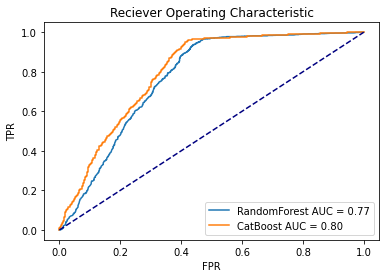

In [145]:
classifiers = {'RandomForest': RandomForestClassifier(),
              'CatBoost': CatBoostClassifier()}

y_true_dict = {'RandomForest': Y_val,
               'CatBoost': Y_val_cat}

y_pred_dict = {'RandomForest': Y_prob,
                'CatBoost': prob_predictions}

compare_classifiers(classifiers, y_true_dict, y_pred_dict)

### Note:
Will not dive into feature importances, hyper-tuning the parameters, or cross validation. Will evaluate now. Best model seems to be the CatBoost. 
- log loss: measures how well a a model can guess the true probability. Lower log loss means better predictions. CB log loss = 0.47 is much lower compared to RF log log loss (1.62)
- ROC AUC: performance measurement that predicts positive outcomes. Higher AUC means a better model. CB shows a better line on the ROC graph; and has a higher AUC score (AUC = 0.80) compared to RF's AUC (0.77).
- Classification Report: CB model shows a little higher stats in all categories.

Without fine tuning the model, CB exhibited farily decent predictive capability.

## 6 - Apply ML to Challenge Set

In [139]:
predictions = cb.predict(test_cat_df)
submission = pd.DataFrame({
    'patient_id': test_cat_df['patient_id'],
    'DiagPeriodL90D': predictions
})

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=2]="MEDICAID": Cannot convert 'b'MEDICAID'' to float

In [47]:
submission.head()

,patient_id,DiaPeriodL90D
0,573710,1
1,593679,1
2,184532,1
3,447383,1
4,687972,1
